### Question 2.1  (How restaurant rating is affected by various features)

Analysis is done based on following factors : 

    1. Aggregate rating vs number of votes
           
           For votes < 2000 No particular trend can be seen.
           For votes > 4000 Ratings go up as number of votes increase (maybe because restaurant is good that's why more people are visiting the restaurant)
           
    2. Aggregate rating vs Average cost for two
           Only Indian restaurants are considered because different currencies in different countries
           No trend can be seen for cost < 3000
           for cost > 3000, rating is > 3
           
    3. Aggregate rating vs Number of cuisines served by the restaurant
            No trend whatsoever
            
    4. Aggregate rating vs cuisines served by a restaurant
            For this, average rating is calculated for each cuisine
            But each cuisine has very different number of restaurants which serve that cuisine
            therefore, more popular cuisines actually have very less average rating
            hence no conclusions can be made
            
            number of cuisines are too many to plot, hence only dataframe is shown

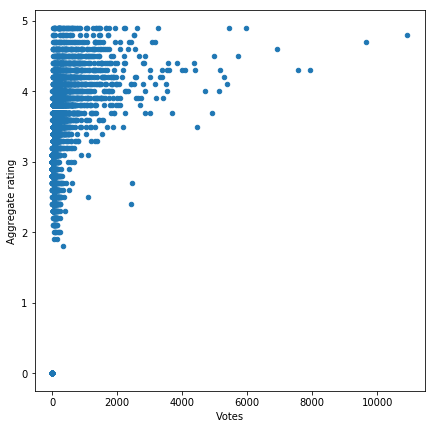

In [44]:
import pandas as pd
import numpy as np

df = pd.read_csv('zomato.csv')
df1 = df[['Aggregate rating','Votes']]
df1 = df1.sort_values(['Votes'], ascending=[True])
df1

import matplotlib.pyplot as plt
%matplotlib inline

df1.plot(x='Votes', y='Aggregate rating', kind = 'scatter', figsize = (7,7))

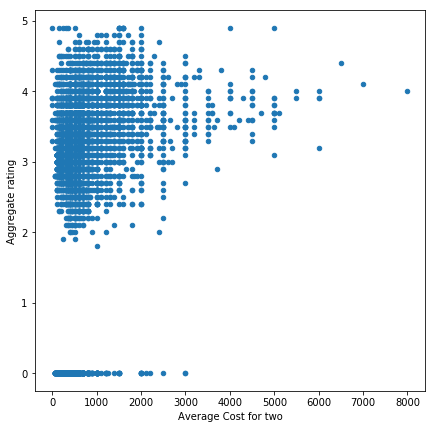

In [125]:
df_India = df[df['Country Code']==1]
df2 = df_India[['Average Cost for two','Aggregate rating']]
df2.plot(x='Average Cost for two', y='Aggregate rating', kind = 'scatter', figsize = (7,7))

In the following code I have have first replaced the cuisines string with the number of cuisines it had

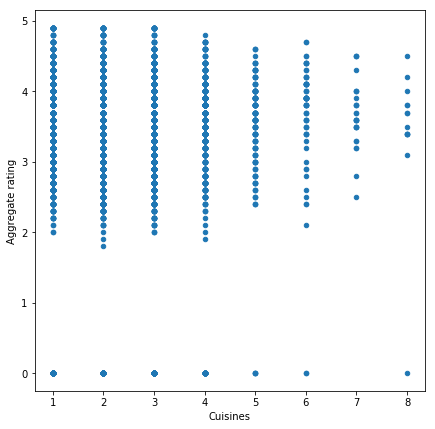

In [127]:
df3 = df[['Cuisines','Aggregate rating']]
df3 = df3[df3['Cuisines'].notnull()]

def foo(a):
    if a is np.nan :
        return 0
    s = a.split(',')
    return len(s)

df3['Cuisines'] = df3['Cuisines'].apply(lambda x: foo(x))
df3.plot(x='Cuisines', y='Aggregate rating', kind = 'scatter', figsize = (7,7))

In the following code I first split the cuisines and made seperate row for each cuisine (line 5 to 14)
Then I count the number of each cuisines present in dataframe and mean rating of all

In [128]:
df4 = df[['Cuisines','Aggregate rating']]
df4 = df4[df4['Cuisines'].notnull()]


def foo(a):
    s = a.split(',')
    return s

df4['Cuisines'] = df4['Cuisines'].apply(lambda x: foo(x))

df4.reset_index(inplace=True)
rows = []
_ = df4.apply(lambda row: [rows.append([row['Aggregate rating'], nn])for nn in row.Cuisines], axis=1)
df_new = pd.DataFrame(rows, columns=['rating','cuisine'])


dfx = (df_new.groupby('cuisine')['rating'].agg(('count','mean')).reset_index())
dfx = dfx.sort_values(['count'], ascending=[False])

dfx

,cuisine,count,mean
209,North Indian,2992,2.399699
33,Chinese,1880,2.755319
46,Fast Food,1314,2.671537
92,North Indian,968,2.852789
157,Chinese,855,2.325731
88,Mughlai,780,2.780256
166,Fast Food,672,2.351042
142,Bakery,621,2.332206
153,Cafe,617,3.232415
65,Italian,530,3.609811


### Question 2.2

1 : A new column 'prod' is created which is the product of rating into votes
2 : data is grouped by locality and sum of votes and prod for each locality is calculated, the result is stored in 'a' 
4 : a new column w_rating is created which is a['prod']/a['Votes']
5 : localities are listed in a decreasing order of weighted rating

In [129]:
df['prod'] = df['Aggregate rating'] * df['Votes']
a = df.groupby("Locality").sum()
a = a[['Votes','prod']]
a['w_rating'] = a['prod']/a['Votes']
a = a.sort_values(['w_rating'], ascending=[False])
a.head(10)

,Votes,prod,w_rating
Locality,,,
New Tampa,1413,6923.7,4.9
West Park,85,416.5,4.9
DIFC,322,1577.8,4.9
"Hotel Clarks Amer, Malviya Nagar",322,1577.8,4.9
Bebek,1042,5105.8,4.9
"Beak Street, Soho",309,1514.1,4.9
"Barwa Towers, Al Sadd",182,891.8,4.9
Penjaringan,605,2964.5,4.9
Deira City Centre Area,641,3140.9,4.9
